<a href="https://colab.research.google.com/github/RubenMcCarty/Big-Data-/blob/main/Lab_03_Spark_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Spark SQL**

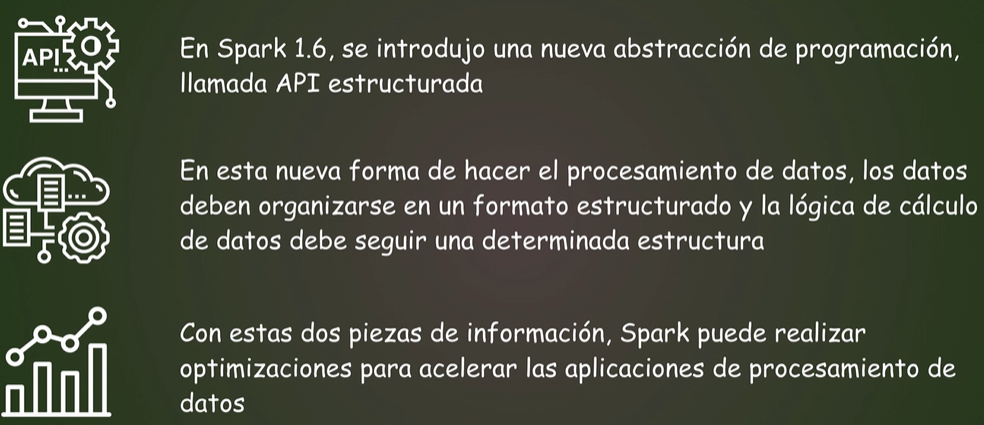

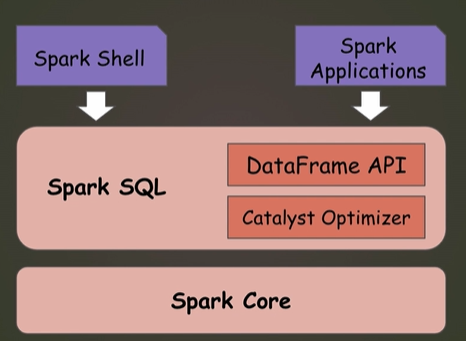

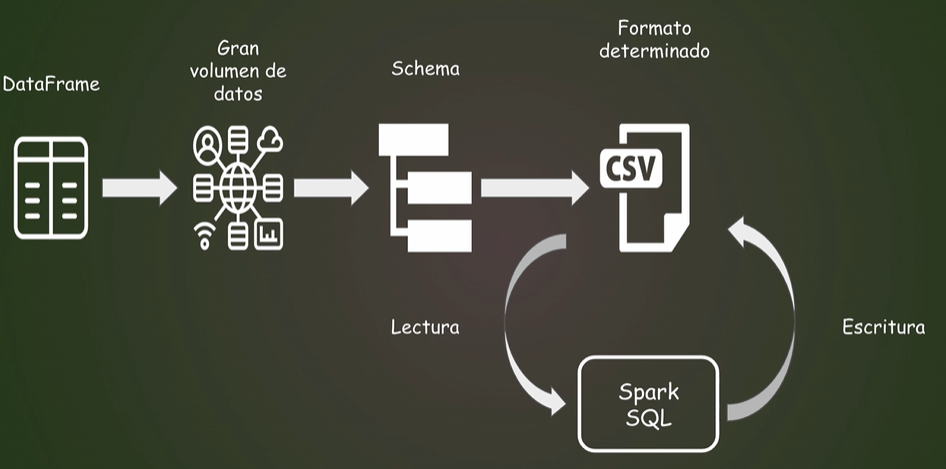

# Acciones: función reduce

In [75]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/ull
!wget -q  https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

In [76]:
# descompremir la version de spark
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

In [77]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"

In [78]:
# Instalar la librería findspark
!pip install -q findspark

In [79]:
# Instalar pyspark
!pip install -q pyspark

In [80]:
# Creando DataFrames

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [82]:
# Crear un dataframe a partir de un RDD
rdd = sc.parallelize([item for item in range(10)]).map(lambda x: (x, x ** 2))

In [83]:
rdd.collect()

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

In [84]:
# CREAmos dataframe de 2 campos:
df = rdd.toDF(['numero', 'cudrado'])

In [85]:
df.printSchema()

root
 |-- numero: long (nullable = true)
 |-- cudrado: long (nullable = true)



In [86]:
df.show()

+------+-------+
|numero|cudrado|
+------+-------+
|     0|      0|
|     1|      1|
|     2|      4|
|     3|      9|
|     4|     16|
|     5|     25|
|     6|     36|
|     7|     49|
|     8|     64|
|     9|     81|
+------+-------+



In [87]:
# Crear un DataFrame a partir de un RDD con schema

rdd1 = sc.parallelize([(1, 'Jose', 35.5), (2, 'Teresa', 54.3), (3, 'Katia', 12.7)])


In [88]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType


In [90]:
# Primera vía

esquema1 = StructType(
    [
     StructField('id', IntegerType(), True),
     StructField('nombre', StringType(), True),
     StructField('saldo', DoubleType(), True)
    ]
)


In [91]:
# Segunda vía

esquema2 = "`id` INT, `nombre` STRING, `saldo` DOUBLE"

df1 = spark.createDataFrame(rdd1, schema=esquema1)

df1.printSchema()

df1.show()

df2 = spark.createDataFrame(rdd1, schema=esquema2)

df2.printSchema()

df2.show()

root
 |-- id: integer (nullable = true)
 |-- nombre: string (nullable = true)
 |-- saldo: double (nullable = true)

+---+------+-----+
| id|nombre|saldo|
+---+------+-----+
|  1|  Jose| 35.5|
|  2|Teresa| 54.3|
|  3| Katia| 12.7|
+---+------+-----+

root
 |-- id: integer (nullable = true)
 |-- nombre: string (nullable = true)
 |-- saldo: double (nullable = true)

+---+------+-----+
| id|nombre|saldo|
+---+------+-----+
|  1|  Jose| 35.5|
|  2|Teresa| 54.3|
|  3| Katia| 12.7|
+---+------+-----+



In [92]:
# Crear un DataFrame a partir de un rango de números

spark.range(5).toDF('id').show()

spark.range(3, 15).toDF('id').show()

spark.range(0, 20, 2).toDF('id').show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+

+---+
| id|
+---+
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
+---+

+---+
| id|
+---+
|  0|
|  2|
|  4|
|  6|
|  8|
| 10|
| 12|
| 14|
| 16|
| 18|
+---+



# Crear un dataframe a partir de fuentes de datos

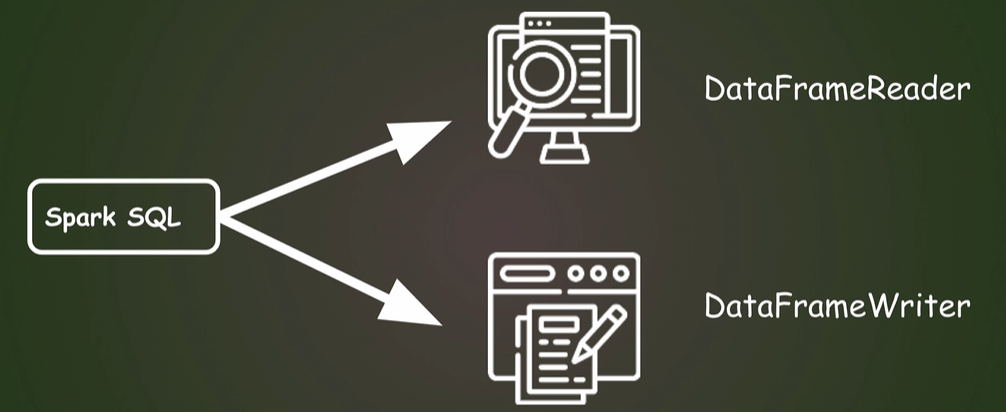

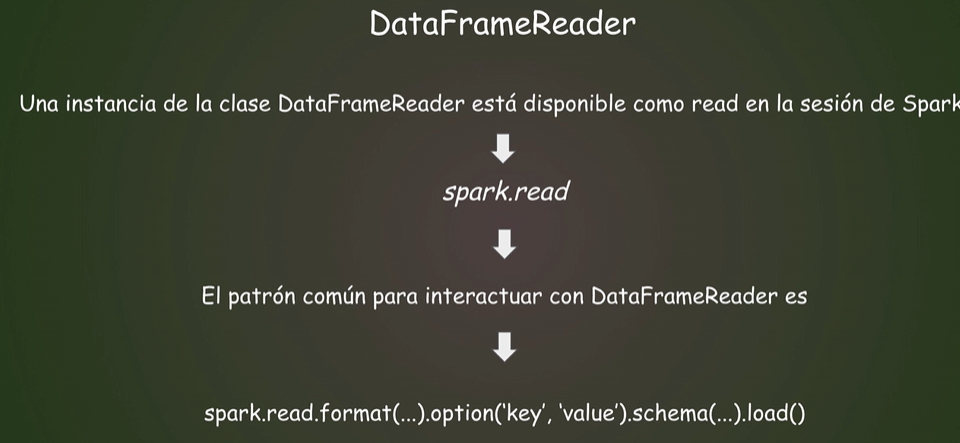

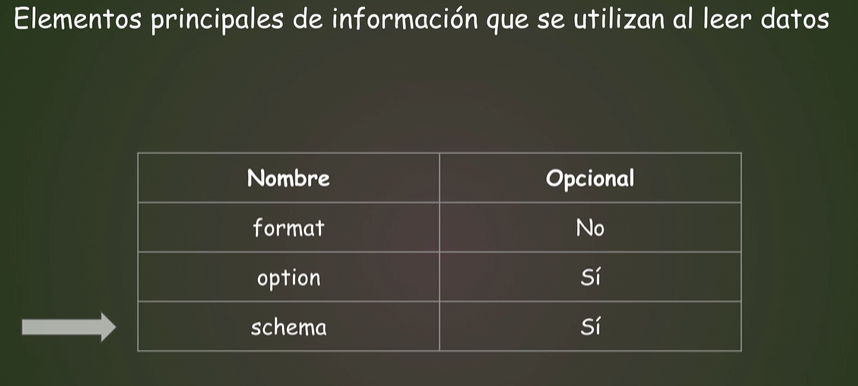

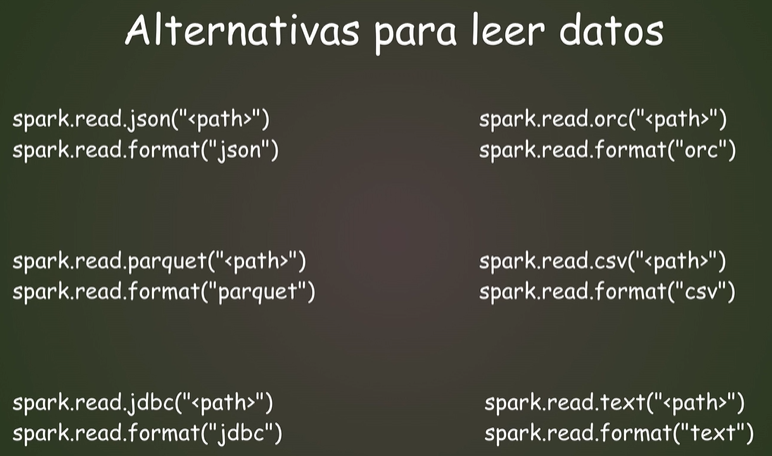

# Crear DataFrames a partir de fuentes de datos en la práctica

In [93]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [94]:
# Crear un DataFrame mediante la lectura de un archivo de texto
df = spark.read.text('./data/dataTXT.txt')

In [95]:
df.show()

+--------------------+
|               value|
+--------------------+
|Estamos en el cur...|
|En este capítulo ...|
|En esta sección e...|
|y en este ejemplo...|
+--------------------+



In [96]:
df.show(truncate=False)

+-----------------------------------------------------------------------+
|value                                                                  |
+-----------------------------------------------------------------------+
|Estamos en el curso de pyspark                                         |
|En este capítulo estamos estudiando el API SQL de Saprk                |
|En esta sección estamos creado dataframes a partir de fuentes de datos,|
|y en este ejemplo creamos un dataframe a partir de un texto plano      |
+-----------------------------------------------------------------------+



# Crear un DataFrame mediante la lectura de un archivo csv

In [97]:
df1 = spark.read.csv('./data/dataCSV.csv')

In [98]:
# vemos que no tiene cabecera o la primera fila es la cabecera
df1.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+--------------------+
|        _c0|          _c1|                 _c2|                 _c3|        _c4|                 _c5|                 _c6|    _c7|   _c8|     _c9|         _c10|                _c11|             _c12|            _c13|                _c14|                _c15|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|vid

In [100]:
df1 = spark.read.option('header', 'true').csv('./data/dataCSV.csv')

In [101]:
# como vemos con las cabeceras
df1.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

# Leer un archivo de texto con un delimitador diferente

In [102]:
df2 = spark.read.option('header', 'true').option('delimiter', '|').csv('./data/dataTab.txt')


In [103]:
df2.show()

+----+----+----------+-----+
|pais|edad|     fecha|color|
+----+----+----------+-----+
|  MX|  23|2021-02-21| rojo|
|  CA|  56|2021-06-10| azul|
|  US|  32|2020-06-02|verde|
+----+----+----------+-----+



# Crear un DataFrame a partir de un json proporcionando un schema

In [104]:
# lo primero es importar librerias
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType


In [105]:
json_schema =  StructType(
    [
     StructField('color', StringType(), True),
     StructField('edad', IntegerType(), True),
     StructField('fecha', DateType(), True),
     StructField('pais', StringType(), True)
    ]
)

In [106]:
df4 = spark.read.schema(json_schema).json('./data/dataJSON.json')

In [107]:

df4.show()

+-----+----+----------+----+
|color|edad|     fecha|pais|
+-----+----+----------+----+
| rojo|null|2021-02-21|  MX|
| azul|null|2021-06-10|  CA|
|verde|null|2020-06-02|  US|
+-----+----+----------+----+



In [108]:
df4.printSchema()

root
 |-- color: string (nullable = true)
 |-- edad: integer (nullable = true)
 |-- fecha: date (nullable = true)
 |-- pais: string (nullable = true)



# Crear un DataFrame a partir de un archivo parquet

In [109]:
df5 = spark.read.parquet('./data/dataPARQUET.parquet')

In [110]:
df5.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal


# Otra alternativa para leer desde una fuente de datos parquet en este caso

In [111]:
df6 = spark.read.format('parquet').load('./data/dataPARQUET.parquet')

In [112]:
df6.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



# Trabajo con columnas

In [113]:
df = spark.read.parquet('./data/dataPARQUET.parquet')

In [114]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [115]:
# Primera alternativa para referirnos a las columnas
df.select('title').show()

+--------------------+
|               title|
+--------------------+
|WE WANT TO TALK A...|
|The Trump Preside...|
|Racist Superman |...|
|Nickelback Lyrics...|
|I Dare You: GOING...|
|2 Weeks with iPho...|
|Roy Moore & Jeff ...|
|5 Ice Cream Gadge...|
|The Greatest Show...|
|Why the rise of t...|
|Dion Lewis' 103-Y...|
|(SPOILERS) 'Shiva...|
|Marshmello - Bloc...|
|Which Countries A...|
|SHOPPING FOR NEW ...|
|    The New SpotMini|
|One Change That W...|
|How does your bod...|
|HomeMade Electric...|
|Founding An Inbre...|
+--------------------+
only showing top 20 rows



In [116]:
# Segunda alternativa

from pyspark.sql.functions import col

df.select(col('title')).show()

+--------------------+
|               title|
+--------------------+
|WE WANT TO TALK A...|
|The Trump Preside...|
|Racist Superman |...|
|Nickelback Lyrics...|
|I Dare You: GOING...|
|2 Weeks with iPho...|
|Roy Moore & Jeff ...|
|5 Ice Cream Gadge...|
|The Greatest Show...|
|Why the rise of t...|
|Dion Lewis' 103-Y...|
|(SPOILERS) 'Shiva...|
|Marshmello - Bloc...|
|Which Countries A...|
|SHOPPING FOR NEW ...|
|    The New SpotMini|
|One Change That W...|
|How does your bod...|
|HomeMade Electric...|
|Founding An Inbre...|
+--------------------+
only showing top 20 rows



# Transformaciones - funciones select y selectExpr

In [121]:
# select

df = spark.read.parquet('./data/datos.parquet')

In [122]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [123]:
from pyspark.sql.functions import col

In [124]:
df.select(col('video_id')).show()

+-----------+
|   video_id|
+-----------+
|2kyS6SvSYSE|
|1ZAPwfrtAFY|
|5qpjK5DgCt4|
|puqaWrEC7tY|
|d380meD0W0M|
|gHZ1Qz0KiKM|
|39idVpFF7NQ|
|nc99ccSXST0|
|jr9QtXwC9vc|
|TUmyygCMMGA|
|9wRQljFNDW8|
|VifQlJit6A0|
|5E4ZBSInqUU|
|GgVmn66oK_A|
|TaTleo4cOs8|
|kgaO45SyaO4|
|ZAQs-ctOqXQ|
|YVfyYrEmzgM|
|eNSN6qet1kE|
|B5HORANmzHw|
+-----------+
only showing top 20 rows



In [125]:
df.select('video_id', 'trending_date').show()

+-----------+-------------+
|   video_id|trending_date|
+-----------+-------------+
|2kyS6SvSYSE|     17.14.11|
|1ZAPwfrtAFY|     17.14.11|
|5qpjK5DgCt4|     17.14.11|
|puqaWrEC7tY|     17.14.11|
|d380meD0W0M|     17.14.11|
|gHZ1Qz0KiKM|     17.14.11|
|39idVpFF7NQ|     17.14.11|
|nc99ccSXST0|     17.14.11|
|jr9QtXwC9vc|     17.14.11|
|TUmyygCMMGA|     17.14.11|
|9wRQljFNDW8|     17.14.11|
|VifQlJit6A0|     17.14.11|
|5E4ZBSInqUU|     17.14.11|
|GgVmn66oK_A|     17.14.11|
|TaTleo4cOs8|     17.14.11|
|kgaO45SyaO4|     17.14.11|
|ZAQs-ctOqXQ|     17.14.11|
|YVfyYrEmzgM|     17.14.11|
|eNSN6qet1kE|     17.14.11|
|B5HORANmzHw|     17.14.11|
+-----------+-------------+
only showing top 20 rows



In [126]:
# Esta vía nos dará error, no soporta y por ello

df.select(
    'likes',
    'dislikes',
    ('likes' - 'dislikes')
).show()

TypeError: ignored

In [127]:
# Forma correcta

df.select(
    col('likes'),
    col('dislikes'),
    (col('likes') - col('dislikes')).alias('aceptacion')
).show()

+------+--------+----------+
| likes|dislikes|aceptacion|
+------+--------+----------+
| 57527|    2966|     54561|
| 97185|    6146|     91039|
|146033|    5339|    140694|
| 10172|     666|      9506|
|132235|    1989|    130246|
|  9763|     511|      9252|
| 15993|    2445|     13548|
| 23663|     778|     22885|
|  3543|     119|      3424|
| 12654|    1363|     11291|
|   655|      25|       630|
|  1576|     303|      1273|
|114188|    1333|    112855|
|  7848|    1171|      6677|
|  7473|     246|      7227|
|  9419|      52|      9367|
|  8011|     638|      7373|
|  5398|      53|      5345|
| 11963|      36|     11927|
|  8421|     191|      8230|
+------+--------+----------+
only showing top 20 rows



In [129]:
# selectExpr

df.selectExpr('likes', 'dislikes', '(likes - dislikes) as aceptacion').show()



+------+--------+----------+
| likes|dislikes|aceptacion|
+------+--------+----------+
| 57527|    2966|     54561|
| 97185|    6146|     91039|
|146033|    5339|    140694|
| 10172|     666|      9506|
|132235|    1989|    130246|
|  9763|     511|      9252|
| 15993|    2445|     13548|
| 23663|     778|     22885|
|  3543|     119|      3424|
| 12654|    1363|     11291|
|   655|      25|       630|
|  1576|     303|      1273|
|114188|    1333|    112855|
|  7848|    1171|      6677|
|  7473|     246|      7227|
|  9419|      52|      9367|
|  8011|     638|      7373|
|  5398|      53|      5345|
| 11963|      36|     11927|
|  8421|     191|      8230|
+------+--------+----------+
only showing top 20 rows



In [130]:
# para contar los diferentes id y lo renombramos en una columna
df.selectExpr("count(distinct(video_id)) as videos").show()

+------+
|videos|
+------+
|  6837|
+------+



# Transformaciones - funciones filter y where

In [131]:
df = spark.read.parquet('./data/datos.parquet')

In [132]:
# filter

In [133]:
from pyspark.sql.functions import col

In [134]:
df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [135]:
df.filter(col('video_id') == '2kyS6SvSYSE').show()

+-----------+-------------+--------------------+-------------+-----------+-------------------+---------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|channel_title|category_id|       publish_time|           tags|  views|likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+-------------+-----------+-------------------+---------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...| CaseyNeistat|         22|2017-11-13 17:13:01|SHANtell martin| 748374|57527|    2966|        15954|https://i.ytimg.c...|            False|           False|                 False|SHANTELL'S CHANNE...|
|2kyS6Sv

In [136]:
df1 = spark.read.parquet('./data/datos.parquet').where(col('trending_date') != '17.14.11')


In [137]:
df1.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|            video_id|       trending_date|               title|       channel_title|         category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|\nCook with confi...|             recipes|              videos| and restaurant g...| dining destinations|               null|                

In [138]:
df2 = spark.read.parquet('./data/datos.parquet').where(col('likes') > 5000)

In [139]:
df2.filter((col('trending_date') != '17.14.11') & (col('likes') > 7000)).show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|YvfYK0EEhK4|     17.15.11|Brent Pella - Why...|         Brent Pella|         23|2017-11-14 15:32:51|"spirit airlines"...| 462490| 14132|     795|          666|https://i.ytimg.c...|            False|           False| 

In [140]:
df2.filter(col('trending_date') != '17.14.11').filter(col('likes') > 7000).show()


+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|YvfYK0EEhK4|     17.15.11|Brent Pella - Why...|         Brent Pella|         23|2017-11-14 15:32:51|"spirit airlines"...| 462490| 14132|     795|          666|https://i.ytimg.c...|            False|           False| 

# Transformaciones - funciones distinct y dropDuplicates

In [141]:
# distinct
df_sin_duplicados = df.distinct()

In [142]:
print('El conteo del dataframe original es {}'.format(df.count()))
print('El conteo del dataframe sin duplicados es {}'.format(df_sin_duplicados.count()))

El conteo del dataframe original es 48137
El conteo del dataframe sin duplicados es 41428


In [143]:
# función dropDuplicates

dataframe = spark.createDataFrame([(1, 'azul', 567), (2, 'rojo', 487), (1, 'azul', 345), (2, 'verde', 783)]).toDF('id', 'color', 'importe')

dataframe.show()

dataframe.dropDuplicates(['id', 'color']).show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    567|
|  2| rojo|    487|
|  1| azul|    345|
|  2|verde|    783|
+---+-----+-------+

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    567|
|  2| rojo|    487|
|  2|verde|    783|
+---+-----+-------+



# Transformaciones - funciones sort y orderBy

In [144]:
spark = SparkSession.builder.getOrCreate()

In [145]:
from pyspark.sql.functions import col

In [148]:
df = (spark.read.parquet('./data')
    .select(col('likes'), col('views'), col('video_id'), col('dislikes'))
    .dropDuplicates(['video_id'])
)


Py4JJavaError: ignored

In [149]:
df.show()


+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [150]:
# sort

df.sort('likes').show()

+--------------------+-------------+-------+--------------------+--------------------+------------+----+-----+-----+--------+-------------+--------------+-----------------+----------------+----------------------+-----------+
|            video_id|trending_date|  title|       channel_title|         category_id|publish_time|tags|views|likes|dislikes|comment_count|thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|description|
+--------------------+-------------+-------+--------------------+--------------------+------------+----+-----+-----+--------+-------------+--------------+-----------------+----------------+----------------------+-----------+
|\nGet More Access...|         null|   null|                null|                null|        null|null| null| null|    null|         null|          null|             null|            null|                  null|       null|
|                  \n|         null|   null|                null|                null|        null|n

In [151]:
from pyspark.sql.functions import desc

df.sort(desc('likes')).show()

+-----------+-------------+-------------------------+-------------------+-----------+-------------------+------------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+-------------------------+
|   video_id|trending_date|                    title|      channel_title|category_id|       publish_time|                    tags|    views|  likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|              description|
+-----------+-------------+-------------------------+-------------------+-----------+-------------------+------------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+-------------------------+
|7C2z4GqqS5E|     18.01.06|BTS (방탄소년단) 'FAKE...|            ibighit|         10|2018-05-18 09:00:02|"BIGHIT"|"빅히트"|"방...|123010920|5613827|  206892|      1228655|https:/

In [152]:
# función orderBy

df.orderBy(col('views')).show()

df.orderBy(col('views').desc()).show()

+--------------------+-------------+-------+--------------------+--------------------+------------+----+-----+-----+--------+-------------+--------------+-----------------+----------------+----------------------+-----------+
|            video_id|trending_date|  title|       channel_title|         category_id|publish_time|tags|views|likes|dislikes|comment_count|thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|description|
+--------------------+-------------+-------+--------------------+--------------------+------------+----+-----+-----+--------+-------------+--------------+-----------------+----------------+----------------------+-----------+
|                  \n|         null|   null|                null|                null|        null|null| null| null|    null|         null|          null|             null|            null|                  null|       null|
|\nInstagram: http...|         null|   null|                null|                null|        null|n

In [153]:
dataframe = spark.createDataFrame([(1, 'azul', 568), (2, 'rojo', 235), (1, 'azul', 456), (2, 'azul', 783)]).toDF('id', 'color', 'importe')

dataframe.show()


+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    568|
|  2| rojo|    235|
|  1| azul|    456|
|  2| azul|    783|
+---+-----+-------+



In [155]:
#ordena por importe
dataframe.orderBy(col('color').desc(), col('importe')).show()


+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  2| rojo|    235|
|  1| azul|    456|
|  1| azul|    568|
|  2| azul|    783|
+---+-----+-------+



In [156]:
# funcion limit

top_10 = df.orderBy(col('views').desc()).limit(10)

top_10.show()

+-----------+-------------+--------------------+-------------------+-----------+-------------------+--------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|      channel_title|category_id|       publish_time|                tags|    views|  likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+-------------------+-----------+-------------------+--------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|VYOjWnS4cMY|     18.02.06|Childish Gambino ...|ChildishGambinoVEVO|         10|2018-05-06 04:00:07|"Childish Gambino...|225211923|5023450|  343541|       517232|https://i.ytimg.c...|            False|          

# Transformaciones - funciones withColumn y withColumnRenamed

In [158]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [160]:

df = spark.read.parquet('./data')

Py4JJavaError: ignored

In [161]:
df_valoracion = df.withColumn('valoracion', col('likes') - col('dislikes'))

In [162]:
df_valoracion.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)
 |-- valoracion: integer (nullable = true)



In [163]:
df_valoracion1 = (df.withColumn('valoracion', col('likes') - col('dislikes'))
                    .withColumn('res_div', col('valoracion') % 10)
)

In [164]:
df_valoracion1.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)
 |-- valoracion: integer (nullable = true)
 |-- res_div: integer (nullable = true)



In [165]:
df_valoracion1.select(col('likes'), col('dislikes'), col('valoracion'), col('res_div')).show()

+------+--------+----------+-------+
| likes|dislikes|valoracion|res_div|
+------+--------+----------+-------+
| 57527|    2966|     54561|      1|
| 97185|    6146|     91039|      9|
|146033|    5339|    140694|      4|
| 10172|     666|      9506|      6|
|132235|    1989|    130246|      6|
|  9763|     511|      9252|      2|
| 15993|    2445|     13548|      8|
| 23663|     778|     22885|      5|
|  3543|     119|      3424|      4|
| 12654|    1363|     11291|      1|
|   655|      25|       630|      0|
|  1576|     303|      1273|      3|
|114188|    1333|    112855|      5|
|  7848|    1171|      6677|      7|
|  7473|     246|      7227|      7|
|  9419|      52|      9367|      7|
|  8011|     638|      7373|      3|
|  5398|      53|      5345|      5|
| 11963|      36|     11927|      7|
|  8421|     191|      8230|      0|
+------+--------+----------+-------+
only showing top 20 rows



In [166]:
# withColumnRenamed

df_renombrado = df.withColumnRenamed('video_id', 'id')

In [167]:
df_renombrado.printSchema()


root
 |-- id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [168]:

df_error = df.withColumnRenamed('nombre_que_no_existe', 'otro_nombre')

In [169]:
df_error.printSchema()


root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



# Transformaciones - funciones drop, sample y randomSplit

In [171]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [172]:
df = spark.read.parquet('./data')

Py4JJavaError: ignored

In [173]:
# drop

df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [174]:
df_util = df.drop('comments_disabled')

In [175]:
df_util.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [176]:
#SI ELIMINAMOS LAS COLUMNAS drop no sale si la columna no existe si agregas cafe no sale error
df_util = df.drop('comments_disabled', 'ratings_disabled', 'thumbnail_link')


In [177]:
df_util.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [178]:
df_util = df.drop('comments_disabled', 'ratings_disabled', 'thumbnail_link', 'cafe')


In [179]:
df_util.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [180]:
# sample

df_muestra = df.sample(0.8)

In [181]:
num_filas = df.count()
num_filas_muestra = df_muestra.count()

In [182]:
print('El 80% de filas del dataframe original es {}'.format(num_filas - (num_filas*0.2)))
print('El numero de filas del dataframe muestra es {}'.format(num_filas_muestra))


El 80% de filas del dataframe original es 38509.6
El numero de filas del dataframe muestra es 38770


In [183]:
df_muestra = df.sample(fraction=0.8, seed=1234)


In [184]:
df_muestra = df.sample(withReplacement=True, fraction=0.8, seed=1234)

In [185]:
# randomSplit  esto trabaja con pesos --ML

train, test = df.randomSplit([0.8, 0.2], seed=1234)

In [190]:
train, validation, test = df.randomSplit([0.6, 0.2, 0.2], seed=1234)

In [196]:
train.count()

28808

In [192]:
validation.count()


9698

In [193]:
test.count()


9631

# Trabajo con datos incorrectos o faltantes


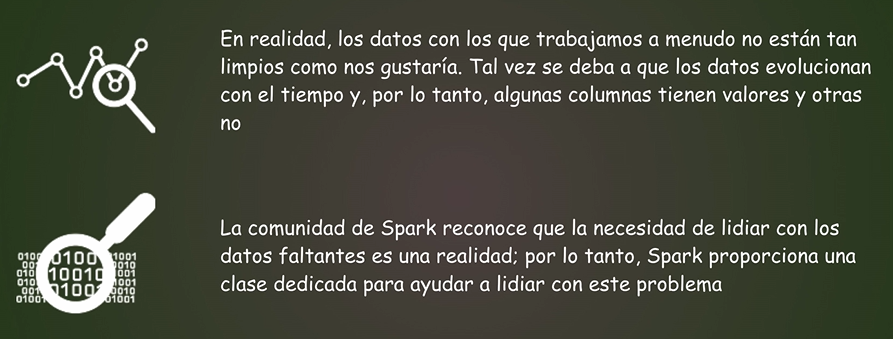

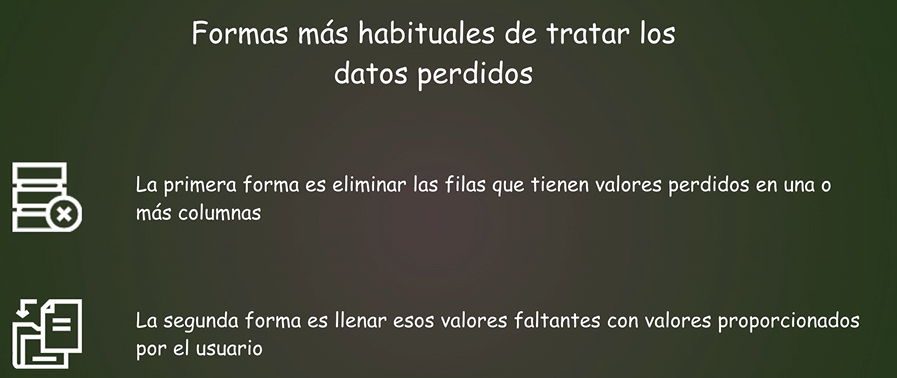

In [194]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [195]:
df = spark.read.parquet('./data/')

Py4JJavaError: ignored

In [197]:
df.count()

48137

In [198]:
df.na.drop().count()

40379

In [199]:
df.na.drop('any').count()

40379

In [200]:
df.dropna().count()

40379

In [201]:
df.na.drop(subset=['views']).count()

40949

In [202]:
df.na.drop(subset=['views', 'dislikes']).count()

40949

In [203]:
from pyspark.sql.functions import col

In [204]:
df.orderBy(col('views')).select(col('views'), col('likes'), col('dislikes')).show()

+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
+-----+-----+--------+
only showing top 20 rows



In [205]:
df.fillna(0).orderBy(col('views')).select(col('views'), col('likes'), col('dislikes')).show()


+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
+-----+-----+--------+
only showing top 20 rows



In [206]:
#aqui solo completa los campos y likes y dislike
df.fillna(0, subset=['likes', 'dislikes']).orderBy(col('views')).select(col('views'), col('likes'), col('dislikes')).show()



+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
+-----+-----+--------+
only showing top 20 rows



# Acciones sobre un dataframe en Spark SQL

In [207]:
# show

df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [208]:

df.show(5)

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [209]:
df.show(5, truncate=False)

+-----------+-------------+--------------------------------------------------------------+---------------------+-----------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+--------+-------------+----------------------------------------------+-----------------+----------------+----------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [210]:
# take

df.take(1)

[Row(video_id='2kyS6SvSYSE', trending_date='17.14.11', title='WE WANT TO TALK ABOUT OUR MARRIAGE', channel_title='CaseyNeistat', category_id='22', publish_time=datetime.datetime(2017, 11, 13, 17, 13, 1), tags='SHANtell martin', views=748374, likes=57527, dislikes=2966, comment_count=15954, thumbnail_link='https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg', comments_disabled='False', ratings_disabled='False', video_error_or_removed='False', description="SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED T

In [213]:
# head

df.head(1)

[Row(video_id='2kyS6SvSYSE', trending_date='17.14.11', title='WE WANT TO TALK ABOUT OUR MARRIAGE', channel_title='CaseyNeistat', category_id='22', publish_time=datetime.datetime(2017, 11, 13, 17, 13, 1), tags='SHANtell martin', views=748374, likes=57527, dislikes=2966, comment_count=15954, thumbnail_link='https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg', comments_disabled='False', ratings_disabled='False', video_error_or_removed='False', description="SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED T

In [212]:
# collect

df.select('likes').collect()

[Row(likes=57527),
 Row(likes=97185),
 Row(likes=146033),
 Row(likes=10172),
 Row(likes=132235),
 Row(likes=9763),
 Row(likes=15993),
 Row(likes=23663),
 Row(likes=3543),
 Row(likes=12654),
 Row(likes=655),
 Row(likes=1576),
 Row(likes=114188),
 Row(likes=7848),
 Row(likes=7473),
 Row(likes=9419),
 Row(likes=8011),
 Row(likes=5398),
 Row(likes=11963),
 Row(likes=8421),
 Row(likes=9586),
 Row(likes=3585),
 Row(likes=11758),
 Row(likes=1707),
 Row(likes=4884),
 Row(likes=8676),
 Row(likes=4687),
 Row(likes=9033),
 Row(likes=156),
 Row(likes=715),
 Row(likes=4035),
 Row(likes=119),
 Row(likes=787419),
 Row(likes=3781),
 Row(likes=1661),
 Row(likes=2486),
 Row(likes=7515),
 Row(likes=1318),
 Row(likes=38397),
 Row(likes=6927),
 Row(likes=5389),
 Row(likes=308),
 Row(likes=7),
 Row(likes=15186),
 Row(likes=4451),
 Row(likes=33505),
 Row(likes=3417),
 Row(likes=2017),
 Row(likes=35),
 Row(likes=45406),
 Row(likes=99086),
 Row(likes=205),
 Row(likes=15397),
 Row(likes=None),
 Row(likes=None),

# Escritura de DataFrames

In [216]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df = spark.read.parquet('./data/')

Py4JJavaError: ignored

In [223]:
df1 = df.repartition(2)

In [224]:
# hay 2 particion
df1.write.format('csv').option('sep', '|').save('./output/csv')

In [220]:
# para guardar el csv en una sola particion
df1.coalesce(1).write.format('csv').option('sep', '|').save('./output/csv1')


In [225]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [226]:
df.select('comments_disabled').distinct().show()

+-----------------+
|comments_disabled|
+-----------------+
|            False|
|             null|
| sports and more.|
|          Wiz Kid|
|             True|
|         farfalle|
+-----------------+



In [227]:
from pyspark.sql.functions import col


In [228]:
df_limpio = df.filter(col('comments_disabled').isin('True', 'False'))

In [229]:
#crea tantas carpetas como valores diferentes
df_limpio.write.partitionBy('comments_disabled').parquet('./output/parquet')

# Persistencia de DataFrames

In [230]:
df = spark.createDataFrame([(1, 'a'), (2, 'b'), (3, 'c')], ['id', 'valor'])


In [231]:
df.show()


+---+-----+
| id|valor|
+---+-----+
|  1|    a|
|  2|    b|
|  3|    c|
+---+-----+



In [232]:
df.persist()


DataFrame[id: bigint, valor: string]

In [233]:
df.unpersist()

DataFrame[id: bigint, valor: string]

In [234]:
df.cache()

DataFrame[id: bigint, valor: string]

In [235]:
from pyspark.storagelevel import StorageLevel

In [236]:
df.persist(StorageLevel.DISK_ONLY)

DataFrame[id: bigint, valor: string]

In [237]:
df.persist(StorageLevel.MEMORY_AND_DISK)

DataFrame[id: bigint, valor: string]